<a href="https://colab.research.google.com/github/areegtarek/RL-GridWorld-Example/blob/main/GridWorld_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GridWorld Example**

Here we calculate the state value functions for all states in the GridWorld example

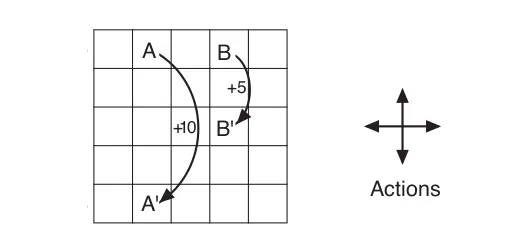

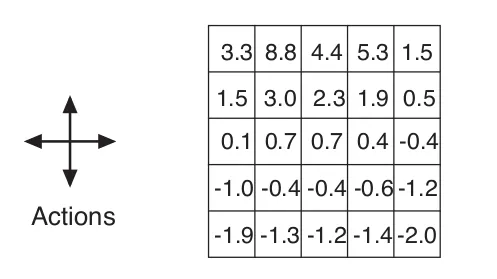




The goal is to find the optimal policy for an agent to navigate through a 5x5 gridworld. The agent can move up, down, left, or right, but the movement is stochastic, meaning that there is a 0.25 probability that the agent will move in each of the four directions.

In [ ]:
import numpy as np

discount_rates = [0.75, 0.85, 0.9]
output = np.zeros((len(discount_rates), 5, 5))

for k, Y in enumerate(discount_rates):
    grid = np.zeros((5,5))
    for num in range(10): #number of times we will go through the whole grid
        for i in range(5):      #all the rows
            for j in range(5):    #all the columns

                up_grid = grid[i-1][j] if i > 0 else 0   #if going up takes us out of the grid then its value be 0
                down_grid = grid[i+1][j] if i < 4 else 0  #if going down takes us out of the grid then its value be 0
                left_grid = grid[i][j-1] if j > 0 else 0  #if going left takes us out of the grid then its value be 0
                right_grid = grid[i][j+1] if j < 4 else 0  #if going right takes us outof the grid then its value be 0

                all_dirs = [up_grid, down_grid, left_grid, right_grid]

                value=0  
                if i==0 and j==1: # the position of A
                    value = 10 + Y*grid[4][1]
                elif i==0 and j==3: # the position of B
                    value = 5 + Y*grid[2][3]
                else:
                    for direc in all_dirs:
                        if direc != 0: 
                            value += .25 * (0 + Y*direc)  #if we don't go out of the grid
                        else:
                            value += .25 * (-1 + Y*grid[i][j]) #if we go out of the grid

                grid[i][j] = value   

    output[k] = np.round(grid, 1)

print(output)

[[[ 2.2  9.4  3.3  5.1  0.7]
  [ 0.7  2.2  1.3  1.2  0.1]
  [-0.2  0.4  0.3  0.2 -0.4]
  [-0.7 -0.3 -0.2 -0.3 -0.8]
  [-1.3 -0.8 -0.7 -0.8 -1.3]]

 [[ 2.9  9.   4.   5.2  1.2]
  [ 1.2  2.7  1.9  1.6  0.3]
  [-0.1  0.6  0.5  0.3 -0.4]
  [-0.9 -0.4 -0.3 -0.5 -1. ]
  [-1.6 -1.1 -1.  -1.2 -1.7]]

 [[ 3.3  8.8  4.4  5.3  1.5]
  [ 1.5  3.   2.2  1.9  0.5]
  [ 0.   0.7  0.7  0.4 -0.4]
  [-1.  -0.4 -0.3 -0.6 -1.2]
  [-1.9 -1.3 -1.2 -1.4 -1.9]]]
